In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from io import StringIO
%matplotlib inline
df1 = pd.read_csv("h1n1_vaccine_prediction.csv")
df1

unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0              0         1.0             0.0                   0.0   
1              1         3.0             2.0                   0.0   
2              2         1.0             1.0                   0.0   
3              3         1.0             1.0                   0.0   
4              4         2.0             1.0                   0.0   
...          ...         ...             ...                   ...   
26702      26702         2.0             0.0                   0.0   
26703      26703         1.0             2.0                   0.0   
26704      26704         2.0             2.0                   0.0   
26705      26705         1.0             1.0                   0.0   
26706      26706         0.0             0.0                   0.0   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                    0.0               0.0                    0.0   
1                    1.0               0.0                    1.0   
2                    1.0               0.0                    0.0   
3                    1.0               0.0                    1.0   
4                    1.0               0.0                    1.0   
...                  ...               ...                    ...   
26702                1.0               0.0                    0.0   
26703                1.0               0.0                    1.0   
26704                1.0               1.0                    1.0   
26705                0.0               0.0                    0.0   
26706                1.0               0.0                    0.0   

       avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  \
0                         0.0                        1.0               1.0   
1                         0.0                        1.0               1.0   
2                         0.0                        0.0               0.0   
3                         1.0                        0.0               0.0   
4                         1.0                        0.0               1.0   
...                       ...                        ...               ...   
26702                     0.0                        1.0               0.0   
26703                     0.0                        0.0               0.0   
26704                     1.0                        0.0               1.0   
26705                     0.0                        0.0               NaN   
26706                     0.0                        0.0               0.0   

       ...      race     sex               income_level  marital_status  \
0      ...     White  Female              Below Poverty     Not Married   
1      ...     White    Male              Below Poverty     Not Married   
2      ...     White    Male  <= $75,000, Above Poverty     Not Married   
3      ...     White  Female              Below Poverty     Not Married   
4      ...     White  Female  <= $75,000, Above Poverty         Married   
...    ...       ...     ...                        ...             ...   
26702  ...     White  Female  <= $75,000, Above Poverty     Not Married   
26703  ...     White    Male  <= $75,000, Above Poverty     Not Married   
26704  ...     White  Female                        NaN     Not Married   
26705  ...  Hispanic  Female  <= $75,000, Above Poverty         Married   
26706  ...     White    Male  <= $75,000, Above Poverty         Married   

       housing_status          employment                census_msa  \
0                 Own  Not in Labor Force                   Non-MSA   
1                Rent            Employed  MSA, Not Principle  City   
2                 Own            Employed  MSA, Not Principle  City   
3                Rent  Not in Labor Force       MSA, Principle City   
4                 Own            Employed  MSA, Not Principle  City   
...               ...                 ...                       ...   
26

In [423]:
df1.h1n1_vaccine.value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

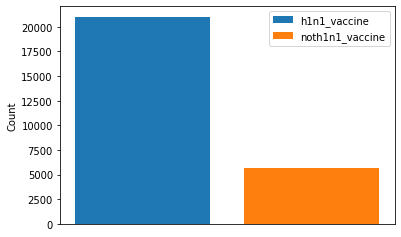

In [427]:
h1n1_vaccine=df1[df1.h1n1_vaccine==0].h1n1_vaccine.count()
noth1n1_vaccine=df1[df1.h1n1_vaccine==1].h1n1_vaccine.count()
plt.bar(0,h1n1_vaccine,label='h1n1_vaccine')
plt.bar(1,noth1n1_vaccine,label='noth1n1_vaccine')
plt.xticks([])
plt.ylabel('Count')
plt.legend()
plt.show()

In [374]:
df1.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [394]:
dff = df1.drop(columns=['has_health_insur'],axis =1)
dff.shape

(26707, 33)

In [395]:
df2 = dff.dropna()
df2.shape

(19642, 33)

In [407]:
label = LabelEncoder()
df2['age_bracket']= label.fit_transform(df2['age_bracket']) 
df2

C:\Users\DEVI LAKSHMI\AppData\Local\Temp\ipykernel_11432\1108657515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age_bracket']= label.fit_transform(df2['age_bracket'])


unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0              0         1.0             0.0                   0.0   
1              1         3.0             2.0                   0.0   
3              3         1.0             1.0                   0.0   
4              4         2.0             1.0                   0.0   
5              5         3.0             1.0                   0.0   
...          ...         ...             ...                   ...   
26700      26700         3.0             1.0                   0.0   
26701      26701         2.0             2.0                   0.0   
26702      26702         2.0             0.0                   0.0   
26703      26703         1.0             2.0                   0.0   
26706      26706         0.0             0.0                   0.0   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                    0.0               0.0                    0.0   
1                    1.0               0.0                    1.0   
3                    1.0               0.0                    1.0   
4                    1.0               0.0                    1.0   
5                    1.0               0.0                    1.0   
...                  ...               ...                    ...   
26700                1.0               0.0                    1.0   
26701                0.0               0.0                    1.0   
26702                1.0               0.0                    0.0   
26703                1.0               0.0                    1.0   
26706                1.0               0.0                    0.0   

       avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  \
0                         0.0                        1.0               1.0   
1                         0.0                        1.0               1.0   
3                         1.0                        0.0               0.0   
4                         1.0                        0.0               1.0   
5                         0.0                        0.0               1.0   
...                       ...                        ...               ...   
26700                     0.0                        0.0               1.0   
26701                     0.0                        0.0               1.0   
26702                     0.0                        1.0               0.0   
26703                     0.0                        0.0               0.0   
26706                     0.0                        0.0               0.0   

       ...   race     sex               income_level  marital_status  \
0      ...  White  Female              Below Poverty     Not Married   
1      ...  White    Male              Below Poverty     Not Married   
3      ...  White  Female              Below Poverty     Not Married   
4      ...  White  Female  <= $75,000, Above Poverty         Married   
5      ...  White    Male  <= $75,000, Above Poverty         Married   
...    ...    ...     ...                        ...             ...   
26700  ...  White  Female                  > $75,000         Married   
26701  ...  White  Female                  > $75,000     Not Married   
26702  ...  White  Female  <= $75,000, Above Poverty     Not Married   
26703  ...  White    Male  <= $75,000, Above Poverty     Not Married   
26706  ...  White    Male  <= $75,000, Above Poverty         Married   

       housing_status          employment  census_msa  no_of_adults  \
0                 Own  Not in Labor Force           2           0.0   
1                Rent            Employed           0           0.0   
3                Rent  Not in Labor Force           1           0.0   
4                 Own            Employed           0           1.0   
5                 Own            Employed           1           2.0   
...               ...                 ...         ...           ...   
26700             Own  Not in Labor Fo

In [408]:
label = LabelEncoder()
df2['race']= label.fit_transform(df2['race']) 
df2

C:\Users\DEVI LAKSHMI\AppData\Local\Temp\ipykernel_11432\3269163607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['race']= label.fit_transform(df2['race'])


unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0              0         1.0             0.0                   0.0   
1              1         3.0             2.0                   0.0   
3              3         1.0             1.0                   0.0   
4              4         2.0             1.0                   0.0   
5              5         3.0             1.0                   0.0   
...          ...         ...             ...                   ...   
26700      26700         3.0             1.0                   0.0   
26701      26701         2.0             2.0                   0.0   
26702      26702         2.0             0.0                   0.0   
26703      26703         1.0             2.0                   0.0   
26706      26706         0.0             0.0                   0.0   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                    0.0               0.0                    0.0   
1                    1.0               0.0                    1.0   
3                    1.0               0.0                    1.0   
4                    1.0               0.0                    1.0   
5                    1.0               0.0                    1.0   
...                  ...               ...                    ...   
26700                1.0               0.0                    1.0   
26701                0.0               0.0                    1.0   
26702                1.0               0.0                    0.0   
26703                1.0               0.0                    1.0   
26706                1.0               0.0                    0.0   

       avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  \
0                         0.0                        1.0               1.0   
1                         0.0                        1.0               1.0   
3                         1.0                        0.0               0.0   
4                         1.0                        0.0               1.0   
5                         0.0                        0.0               1.0   
...                       ...                        ...               ...   
26700                     0.0                        0.0               1.0   
26701                     0.0                        0.0               1.0   
26702                     0.0                        1.0               0.0   
26703                     0.0                        0.0               0.0   
26706                     0.0                        0.0               0.0   

       ...  race     sex               income_level  marital_status  \
0      ...     3  Female              Below Poverty     Not Married   
1      ...     3    Male              Below Poverty     Not Married   
3      ...     3  Female              Below Poverty     Not Married   
4      ...     3  Female  <= $75,000, Above Poverty         Married   
5      ...     3    Male  <= $75,000, Above Poverty         Married   
...    ...   ...     ...                        ...             ...   
26700  ...     3  Female                  > $75,000         Married   
26701  ...     3  Female                  > $75,000     Not Married   
26702  ...     3  Female  <= $75,000, Above Poverty     Not Married   
26703  ...     3    Male  <= $75,000, Above Poverty     Not Married   
26706  ...     3    Male  <= $75,000, Above Poverty         Married   

       housing_status          employment  census_msa  no_of_adults  \
0                 Own  Not in Labor Force           2           0.0   
1                Rent            Employed           0           0.0   
3                Rent  Not in Labor Force           1           0.0   
4                 Own            Employed           0           1.0   
5                 Own            Employed           1           2.0   
...               ...                 ...         ...           ...   
26700             Own  Not in Labor Force         

In [409]:
label = LabelEncoder()
df2['sex']= label.fit_transform(df2['sex']) 
df2

C:\Users\DEVI LAKSHMI\AppData\Local\Temp\ipykernel_11432\1529088132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sex']= label.fit_transform(df2['sex'])


unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0              0         1.0             0.0                   0.0   
1              1         3.0             2.0                   0.0   
3              3         1.0             1.0                   0.0   
4              4         2.0             1.0                   0.0   
5              5         3.0             1.0                   0.0   
...          ...         ...             ...                   ...   
26700      26700         3.0             1.0                   0.0   
26701      26701         2.0             2.0                   0.0   
26702      26702         2.0             0.0                   0.0   
26703      26703         1.0             2.0                   0.0   
26706      26706         0.0             0.0                   0.0   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                    0.0               0.0                    0.0   
1                    1.0               0.0                    1.0   
3                    1.0               0.0                    1.0   
4                    1.0               0.0                    1.0   
5                    1.0               0.0                    1.0   
...                  ...               ...                    ...   
26700                1.0               0.0                    1.0   
26701                0.0               0.0                    1.0   
26702                1.0               0.0                    0.0   
26703                1.0               0.0                    1.0   
26706                1.0               0.0                    0.0   

       avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  \
0                         0.0                        1.0               1.0   
1                         0.0                        1.0               1.0   
3                         1.0                        0.0               0.0   
4                         1.0                        0.0               1.0   
5                         0.0                        0.0               1.0   
...                       ...                        ...               ...   
26700                     0.0                        0.0               1.0   
26701                     0.0                        0.0               1.0   
26702                     0.0                        1.0               0.0   
26703                     0.0                        0.0               0.0   
26706                     0.0                        0.0               0.0   

       ...  race  sex               income_level  marital_status  \
0      ...     3    0              Below Poverty     Not Married   
1      ...     3    1              Below Poverty     Not Married   
3      ...     3    0              Below Poverty     Not Married   
4      ...     3    0  <= $75,000, Above Poverty         Married   
5      ...     3    1  <= $75,000, Above Poverty         Married   
...    ...   ...  ...                        ...             ...   
26700  ...     3    0                  > $75,000         Married   
26701  ...     3    0                  > $75,000     Not Married   
26702  ...     3    0  <= $75,000, Above Poverty     Not Married   
26703  ...     3    1  <= $75,000, Above Poverty     Not Married   
26706  ...     3    1  <= $75,000, Above Poverty         Married   

       housing_status          employment  census_msa  no_of_adults  \
0                 Own  Not in Labor Force           2           0.0   
1                Rent            Employed           0           0.0   
3                Rent  Not in Labor Force           1           0.0   
4                 Own            Employed           0           1.0   
5                 Own            Employed           1           2.0   
...               ...                 ...         ...           ...   
26700             Own  Not in Labor Force           1           1.0   
26701          

In [410]:
label = LabelEncoder()
df2['income_level']= label.fit_transform(df2['income_level']) 
df2

C:\Users\DEVI LAKSHMI\AppData\Local\Temp\ipykernel_11432\3863700433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['income_level']= label.fit_transform(df2['income_level'])


unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0              0         1.0             0.0                   0.0   
1              1         3.0             2.0                   0.0   
3              3         1.0             1.0                   0.0   
4              4         2.0             1.0                   0.0   
5              5         3.0             1.0                   0.0   
...          ...         ...             ...                   ...   
26700      26700         3.0             1.0                   0.0   
26701      26701         2.0             2.0                   0.0   
26702      26702         2.0             0.0                   0.0   
26703      26703         1.0             2.0                   0.0   
26706      26706         0.0             0.0                   0.0   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                    0.0               0.0                    0.0   
1                    1.0               0.0                    1.0   
3                    1.0               0.0                    1.0   
4                    1.0               0.0                    1.0   
5                    1.0               0.0                    1.0   
...                  ...               ...                    ...   
26700                1.0               0.0                    1.0   
26701                0.0               0.0                    1.0   
26702                1.0               0.0                    0.0   
26703                1.0               0.0                    1.0   
26706                1.0               0.0                    0.0   

       avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  \
0                         0.0                        1.0               1.0   
1                         0.0                        1.0               1.0   
3                         1.0                        0.0               0.0   
4                         1.0                        0.0               1.0   
5                         0.0                        0.0               1.0   
...                       ...                        ...               ...   
26700                     0.0                        0.0               1.0   
26701                     0.0                        0.0               1.0   
26702                     0.0                        1.0               0.0   
26703                     0.0                        0.0               0.0   
26706                     0.0                        0.0               0.0   

       ...  race  sex  income_level  marital_status  housing_status  \
0      ...     3    0             2     Not Married             Own   
1      ...     3    1             2     Not Married            Rent   
3      ...     3    0             2     Not Married            Rent   
4      ...     3    0             0         Married             Own   
5      ...     3    1             0         Married             Own   
...    ...   ...  ...           ...             ...             ...   
26700  ...     3    0             1         Married             Own   
26701  ...     3    0             1     Not Married            Rent   
26702  ...     3    0             0     Not Married             Own   
26703  ...     3    1             0     Not Married            Rent   
26706  ...     3    1             0         Married             Own   

               employment  census_msa  no_of_adults  no_of_children  \
0      Not in Labor Force           2           0.0             0.0   
1                Employed           0           0.0             0.0   
3      Not in Labor Force           1           0.0             0.0   
4                Employed           0           1.0             0.0   
5                Employed           1           2.0             3.0   
...                   ...         ...           ...             ...   
26700  Not in Labor Force           1           1.

In [411]:
label = LabelEncoder()
df2['marital_status']= label.fit_transform(df2['marital_status']) 
df2

C:\Users\DEVI LAKSHMI\AppData\Local\Temp\ipykernel_11432\3988189614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['marital_status']= label.fit_transform(df2['marital_status'])


unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0              0         1.0             0.0                   0.0   
1              1         3.0             2.0                   0.0   
3              3         1.0             1.0                   0.0   
4              4         2.0             1.0                   0.0   
5              5         3.0             1.0                   0.0   
...          ...         ...             ...                   ...   
26700      26700         3.0             1.0                   0.0   
26701      26701         2.0             2.0                   0.0   
26702      26702         2.0             0.0                   0.0   
26703      26703         1.0             2.0                   0.0   
26706      26706         0.0             0.0                   0.0   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                    0.0               0.0                    0.0   
1                    1.0               0.0                    1.0   
3                    1.0               0.0                    1.0   
4                    1.0               0.0                    1.0   
5                    1.0               0.0                    1.0   
...                  ...               ...                    ...   
26700                1.0               0.0                    1.0   
26701                0.0               0.0                    1.0   
26702                1.0               0.0                    0.0   
26703                1.0               0.0                    1.0   
26706                1.0               0.0                    0.0   

       avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  \
0                         0.0                        1.0               1.0   
1                         0.0                        1.0               1.0   
3                         1.0                        0.0               0.0   
4                         1.0                        0.0               1.0   
5                         0.0                        0.0               1.0   
...                       ...                        ...               ...   
26700                     0.0                        0.0               1.0   
26701                     0.0                        0.0               1.0   
26702                     0.0                        1.0               0.0   
26703                     0.0                        0.0               0.0   
26706                     0.0                        0.0               0.0   

       ...  race  sex  income_level  marital_status  housing_status  \
0      ...     3    0             2               1             Own   
1      ...     3    1             2               1            Rent   
3      ...     3    0             2               1            Rent   
4      ...     3    0             0               0             Own   
5      ...     3    1             0               0             Own   
...    ...   ...  ...           ...             ...             ...   
26700  ...     3    0             1               0             Own   
26701  ...     3    0             1               1            Rent   
26702  ...     3    0             0               1             Own   
26703  ...     3    1             0               1            Rent   
26706  ...     3    1             0               0             Own   

               employment  census_msa  no_of_adults  no_of_children  \
0      Not in Labor Force           2           0.0             0.0   
1                Employed           0           0.0             0.0   
3      Not in Labor Force           1           0.0             0.0   
4                Employed           0           1.0             0.0   
5                Employed           1           2.0             3.0   
...                   ...         ...           ...             ...   
26700  Not in Labor Force           1           1.

In [412]:
label = LabelEncoder()
df2['housing_status']= label.fit_transform(df2['housing_status']) 
df2

C:\Users\DEVI LAKSHMI\AppData\Local\Temp\ipykernel_11432\3136017903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['housing_status']= label.fit_transform(df2['housing_status'])


unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0              0         1.0             0.0                   0.0   
1              1         3.0             2.0                   0.0   
3              3         1.0             1.0                   0.0   
4              4         2.0             1.0                   0.0   
5              5         3.0             1.0                   0.0   
...          ...         ...             ...                   ...   
26700      26700         3.0             1.0                   0.0   
26701      26701         2.0             2.0                   0.0   
26702      26702         2.0             0.0                   0.0   
26703      26703         1.0             2.0                   0.0   
26706      26706         0.0             0.0                   0.0   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                    0.0               0.0                    0.0   
1                    1.0               0.0                    1.0   
3                    1.0               0.0                    1.0   
4                    1.0               0.0                    1.0   
5                    1.0               0.0                    1.0   
...                  ...               ...                    ...   
26700                1.0               0.0                    1.0   
26701                0.0               0.0                    1.0   
26702                1.0               0.0                    0.0   
26703                1.0               0.0                    1.0   
26706                1.0               0.0                    0.0   

       avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  \
0                         0.0                        1.0               1.0   
1                         0.0                        1.0               1.0   
3                         1.0                        0.0               0.0   
4                         1.0                        0.0               1.0   
5                         0.0                        0.0               1.0   
...                       ...                        ...               ...   
26700                     0.0                        0.0               1.0   
26701                     0.0                        0.0               1.0   
26702                     0.0                        1.0               0.0   
26703                     0.0                        0.0               0.0   
26706                     0.0                        0.0               0.0   

       ...  race  sex  income_level  marital_status  housing_status  \
0      ...     3    0             2               1               0   
1      ...     3    1             2               1               1   
3      ...     3    0             2               1               1   
4      ...     3    0             0               0               0   
5      ...     3    1             0               0               0   
...    ...   ...  ...           ...             ...             ...   
26700  ...     3    0             1               0               0   
26701  ...     3    0             1               1               1   
26702  ...     3    0             0               1               0   
26703  ...     3    1             0               1               1   
26706  ...     3    1             0               0               0   

               employment  census_msa  no_of_adults  no_of_children  \
0      Not in Labor Force           2           0.0             0.0   
1                Employed           0           0.0             0.0   
3      Not in Labor Force           1           0.0             0.0   
4                Employed           0           1.0             0.0   
5                Employed           1           2.0             3.0   
...                   ...         ...           ...             ...   
26700  Not in Labor Force           1           1.

In [413]:
label = LabelEncoder()
df2['employment']= label.fit_transform(df2['employment']) 
df2

C:\Users\DEVI LAKSHMI\AppData\Local\Temp\ipykernel_11432\2117168710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['employment']= label.fit_transform(df2['employment'])


unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0              0         1.0             0.0                   0.0   
1              1         3.0             2.0                   0.0   
3              3         1.0             1.0                   0.0   
4              4         2.0             1.0                   0.0   
5              5         3.0             1.0                   0.0   
...          ...         ...             ...                   ...   
26700      26700         3.0             1.0                   0.0   
26701      26701         2.0             2.0                   0.0   
26702      26702         2.0             0.0                   0.0   
26703      26703         1.0             2.0                   0.0   
26706      26706         0.0             0.0                   0.0   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                    0.0               0.0                    0.0   
1                    1.0               0.0                    1.0   
3                    1.0               0.0                    1.0   
4                    1.0               0.0                    1.0   
5                    1.0               0.0                    1.0   
...                  ...               ...                    ...   
26700                1.0               0.0                    1.0   
26701                0.0               0.0                    1.0   
26702                1.0               0.0                    0.0   
26703                1.0               0.0                    1.0   
26706                1.0               0.0                    0.0   

       avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  \
0                         0.0                        1.0               1.0   
1                         0.0                        1.0               1.0   
3                         1.0                        0.0               0.0   
4                         1.0                        0.0               1.0   
5                         0.0                        0.0               1.0   
...                       ...                        ...               ...   
26700                     0.0                        0.0               1.0   
26701                     0.0                        0.0               1.0   
26702                     0.0                        1.0               0.0   
26703                     0.0                        0.0               0.0   
26706                     0.0                        0.0               0.0   

       ...  race  sex  income_level  marital_status  housing_status  \
0      ...     3    0             2               1               0   
1      ...     3    1             2               1               1   
3      ...     3    0             2               1               1   
4      ...     3    0             0               0               0   
5      ...     3    1             0               0               0   
...    ...   ...  ...           ...             ...             ...   
26700  ...     3    0             1               0               0   
26701  ...     3    0             1               1               1   
26702  ...     3    0             0               1               0   
26703  ...     3    1             0               1               1   
26706  ...     3    1             0               0               0   

       employment  census_msa  no_of_adults  no_of_children  h1n1_vaccine  
0               1           2           0.0             0.0             0  
1               0           0           0.0             0.0             0  
3               1           1           0.0             0.0             0  
4               0           0           1.0             0.0             0  
5               0           1           2.0             3.0             0  
...           ...         ...           ...             ...           ...  
26700          

In [414]:
label = LabelEncoder()
df2['qualification']= label.fit_transform(df2['qualification']) 
df2

C:\Users\DEVI LAKSHMI\AppData\Local\Temp\ipykernel_11432\1373293528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['qualification']= label.fit_transform(df2['qualification'])


unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0              0         1.0             0.0                   0.0   
1              1         3.0             2.0                   0.0   
3              3         1.0             1.0                   0.0   
4              4         2.0             1.0                   0.0   
5              5         3.0             1.0                   0.0   
...          ...         ...             ...                   ...   
26700      26700         3.0             1.0                   0.0   
26701      26701         2.0             2.0                   0.0   
26702      26702         2.0             0.0                   0.0   
26703      26703         1.0             2.0                   0.0   
26706      26706         0.0             0.0                   0.0   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                    0.0               0.0                    0.0   
1                    1.0               0.0                    1.0   
3                    1.0               0.0                    1.0   
4                    1.0               0.0                    1.0   
5                    1.0               0.0                    1.0   
...                  ...               ...                    ...   
26700                1.0               0.0                    1.0   
26701                0.0               0.0                    1.0   
26702                1.0               0.0                    0.0   
26703                1.0               0.0                    1.0   
26706                1.0               0.0                    0.0   

       avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  \
0                         0.0                        1.0               1.0   
1                         0.0                        1.0               1.0   
3                         1.0                        0.0               0.0   
4                         1.0                        0.0               1.0   
5                         0.0                        0.0               1.0   
...                       ...                        ...               ...   
26700                     0.0                        0.0               1.0   
26701                     0.0                        0.0               1.0   
26702                     0.0                        1.0               0.0   
26703                     0.0                        0.0               0.0   
26706                     0.0                        0.0               0.0   

       ...  race  sex  income_level  marital_status  housing_status  \
0      ...     3    0             2               1               0   
1      ...     3    1             2               1               1   
3      ...     3    0             2               1               1   
4      ...     3    0             0               0               0   
5      ...     3    1             0               0               0   
...    ...   ...  ...           ...             ...             ...   
26700  ...     3    0             1               0               0   
26701  ...     3    0             1               1               1   
26702  ...     3    0             0               1               0   
26703  ...     3    1             0               1               1   
26706  ...     3    1             0               0               0   

       employment  census_msa  no_of_adults  no_of_children  h1n1_vaccine  
0               1           2           0.0             0.0             0  
1               0           0           0.0             0.0             0  
3               1           1           0.0             0.0             0  
4               0           0           1.0             0.0             0  
5               0           1           2.0             3.0             0  
...           ...         ...           ...             ...           ...  
26700          

In [415]:
label = LabelEncoder()
df2['census_msa']= label.fit_transform(df2['census_msa']) 
df2.shape

C:\Users\DEVI LAKSHMI\AppData\Local\Temp\ipykernel_11432\3002019857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['census_msa']= label.fit_transform(df2['census_msa'])


(19642, 33)

In [416]:
x = df2.drop('h1n1_vaccine',axis=1)
y = df2['h1n1_vaccine']
X_train,X_test, y_train,y_test = train_test_split(x,y,test_size=0.2)
y_test

3886     0
2868     1
5593     0
17611    0
723      1
        ..
14726    1
20470    0
21265    0
26500    0
13697    1
Name: h1n1_vaccine, Length: 3929, dtype: int64

In [431]:
forest =  RandomForestClassifier()
forest.fit(X_train, y_train)
y_predict =forest.predict(X_test)
accuracy_score(y_test, y_predict)
print("ACCURACY OF THE MODEL",accuracy_score(y_test, y_predict))
print("before smot accuracy is",accuracy_score(y_test, y_predict))

ACCURACY OF THE MODEL 0.8284550776278952
before smot accuracy is 0.8284550776278952


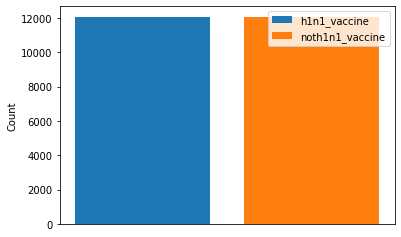

In [418]:
h1n1_vaccine=oy_train[oy_train==0].count()
noth1n1_vaccine=oy_train[oy_train==1].count()
plt.bar(0,h1n1_vaccine,label='h1n1_vaccine')
plt.bar(1,noth1n1_vaccine,label='noth1n1_vaccine')
plt.xticks([])
plt.ylabel('Count')
plt.legend()
plt.show()

In [419]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
oX_train, oy_train = smt.fit_resample(x, y)
X_train,X_test, y_train,y_test = train_test_split(x,y,test_size=0.2)

In [430]:
randfor =  RandomForestClassifier()
randfor.fit(X_train, y_train)
y_predict =randfor.predict(X_test)
accuracy_score(y_test, y_predict)
print("After smot accuracy is",accuracy_score(y_test, y_predict))

After smot accuracy is 0.8261644184270807
